In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
# from google.colab import drive, files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
csv_path = '/content/gdrive/MyDrive/The Explainables - XAI/Dataset/adult.data'

In [5]:
# Set the column names for the columns in the CSV. If the CSV's first line is a header line containing
# the column names, then set this to None.
csv_columns = [
  "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status",
  "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
  "Hours-per-week", "Country", "Over-50K"]

# Read the dataset from the provided CSV and print out information about it.
df = pd.read_csv(csv_path, names=csv_columns, skipinitialspace=True)

In [6]:
df

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Over-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.nunique()

Age                  73
Workclass             9
fnlwgt            21648
Education            16
Education-Num        16
Marital-Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital-Gain        119
Capital-Loss         92
Hours-per-week       94
Country              42
Over-50K              2
dtype: int64

In [8]:
for col in df.select_dtypes(include=[object]):
    print(f" Column {col}, has options:, {df[col].unique()}\n")

 Column Workclass, has options:, ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

 Column Education, has options:, ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 Column Marital-Status, has options:, ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Column Occupation, has options:, ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

 Column Relationship, has options:, ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

 Column Race, has options:, ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

 

In [9]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Marital-Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-per-week     int64
Country           object
Over-50K          object
dtype: object

In [10]:
df.describe()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Check for NaN values
df.isnull().sum().sort_values(ascending=False)

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-week    0
Country           0
Over-50K          0
dtype: int64

In [12]:
# Check for '?' Values
((df['Workclass'] == '?') | (df['Country'] == '?') | (df['Occupation'] == '?')).sum()

2399

In [13]:
# Drop all '?' Values
df = df.drop(df[(df['Workclass'] == '?') | (df['Country'] == '?') | (df['Occupation'] == '?')].index)
df

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Over-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


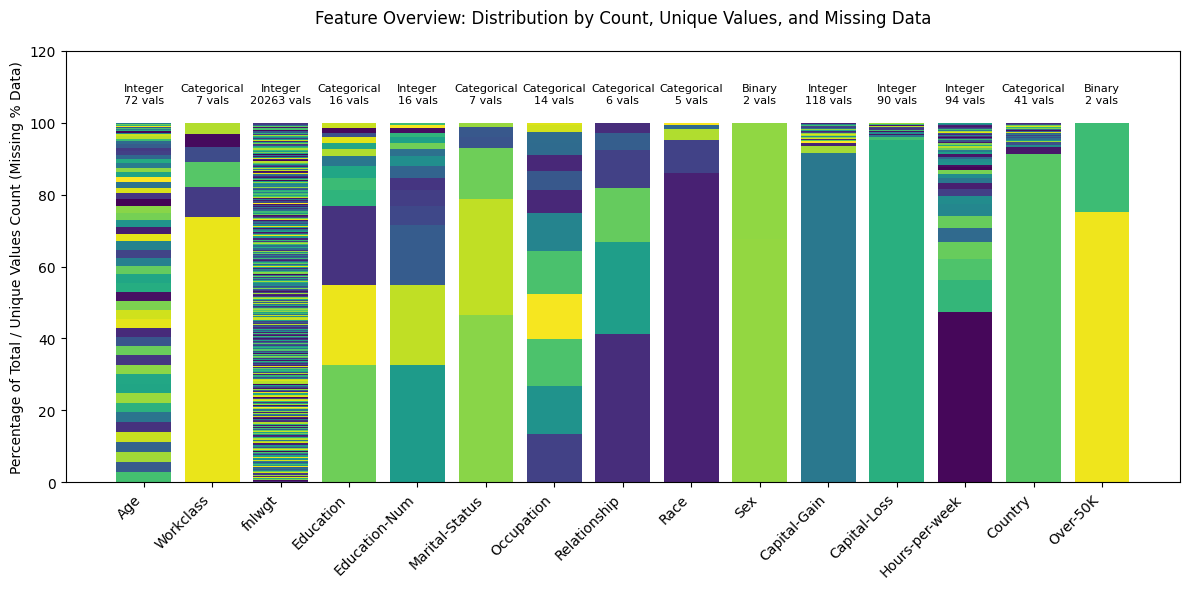

In [14]:
# Creates a plot that shows Distribution by Count, Unique Values, and Missing Data

column_names = [
    "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status",
    "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
    "Hours-per-week", "Country", "Over-50K"
]

df_replaced = df.copy()
df_replaced = df_replaced.replace('?', np.nan)

# Manually define a mapping from data types / column names to more descriptive types
type_descriptions = {
    "Age": "Integer",
    "Workclass": "Categorical",
    "fnlwgt": "Integer",
    "Education": "Categorical",
    "Education-Num": "Integer",
    "Marital-Status": "Categorical",
    "Occupation": "Categorical",
    "Relationship": "Categorical",
    "Race": "Categorical",
    "Sex": "Binary",
    "Capital-Gain": "Integer",
    "Capital-Loss": "Integer",
    "Hours-per-week": "Integer",
    "Country": "Categorical",
    "Over-50K": "Binary"
}

total_count = len(df_replaced)
fig, ax1 = plt.subplots(figsize=(12, 6))
palette = plt.cm.viridis

for i, feature in enumerate(df_replaced.columns):
    value_counts = df_replaced[feature].value_counts(dropna=False)
    cumulative_bottom = 0

    # Draw segments for unique values
    for value, count in value_counts.items():
        if pd.isna(value):
            continue
        segment_height = count / total_count * 100
        color = palette(np.random.rand())
        ax1.bar(feature, segment_height, bottom=cumulative_bottom, color=color, width=0.8)
        cumulative_bottom += segment_height

    # Draw black segment for missing values if they exist
    missing_segment_height = 0
    if np.nan in value_counts:
        missing_count = value_counts[np.nan]
        missing_segment_height = missing_count / total_count * 100
        ax1.bar(feature, missing_segment_height, bottom=cumulative_bottom, color='black', width=0.8)
        cumulative_bottom += missing_segment_height

    # Annotate with more descriptive type information
    descriptive_type = type_descriptions.get(feature, 'Unknown')
    annotation_text = f'{descriptive_type}\n{value_counts.size - int(np.nan in value_counts)} vals'
    if missing_segment_height > 0:
        annotation_text += f'\n({missing_segment_height:.1f}% NaN)'
    ax1.text(i, 105, annotation_text, ha='center', va='bottom', fontsize=8)

ax1.set_ylim([0, 120])
ax1.set_ylabel('Percentage of Total / Unique Values Count (Missing % Data)')
ax1.set_title('Feature Overview: Distribution by Count, Unique Values, and Missing Data', pad=20)

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [15]:
def plot_histogram(dataframe, column_name):
    "Function that plots a histogram of a specific column of the dataframe"

    # Check if column_name exists in the dataframe
    if column_name not in dataframe.columns:
        print(f"Column '{column_name}' does not exist in the dataframe.")
        return

    # Get unique values in the column
    unique_values = dataframe[column_name].unique()
    num_bins = len(unique_values)

    # Calculate histogram
    counts, bins, _ = plt.hist(dataframe[column_name], bins=num_bins, color='skyblue', edgecolor='black')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    bin_width = bins[1] - bins[0]
    plt.xticks(bins[:-1] + bin_width / 2, unique_values, rotation=90)

    # Show plot
    plt.show()

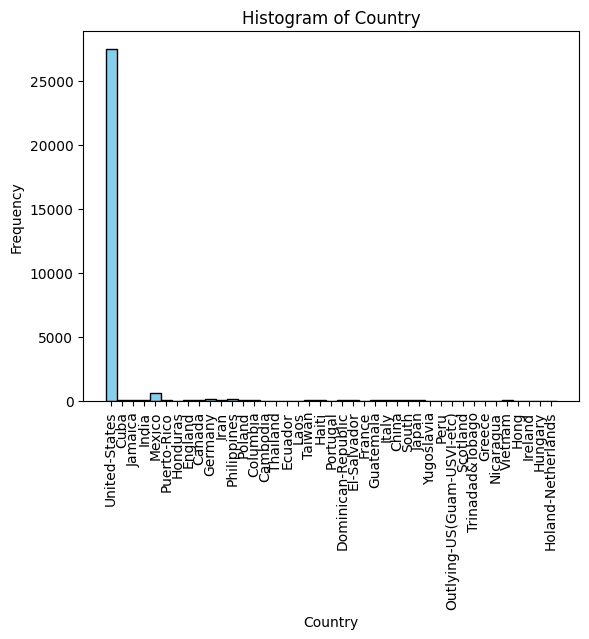

In [16]:
plot_histogram(df, 'Country')

In [17]:
# Creation of a new 'In-USA" column that will eventually replace Country
df["In-USA"] = df.apply(lambda x: str(x["Country"]=='United-States'), axis=1)
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Over-50K,In-USA
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False


In [18]:
plot_histogram(df, 'in_USA')

Column 'in_USA' does not exist in the dataframe.


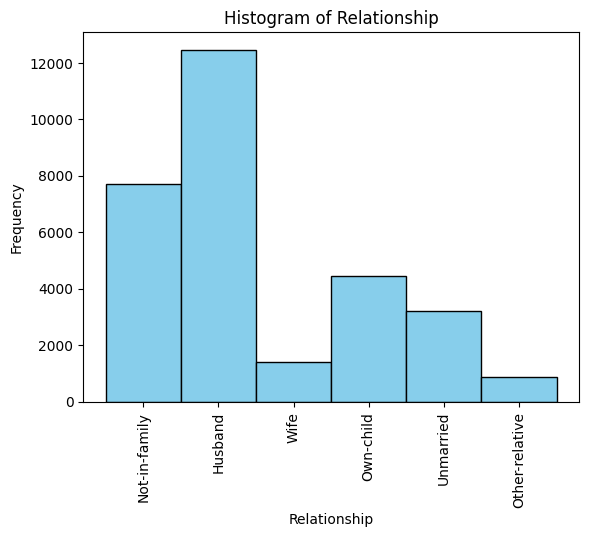

In [19]:
plot_histogram(df, 'Relationship')

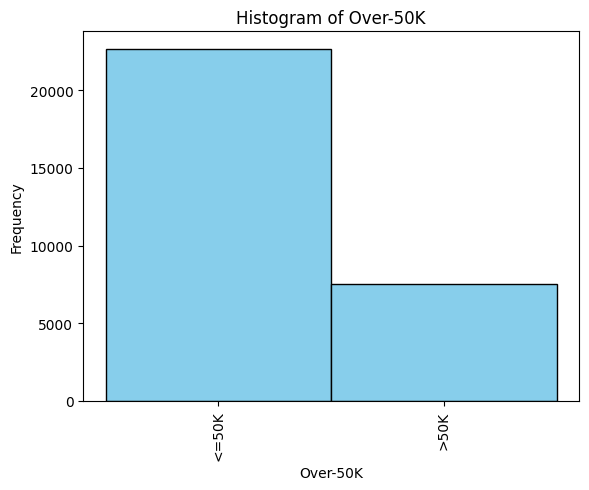

In [20]:
plot_histogram(df, 'Over-50K')

<ipython-input-21-bd331926af4f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().drop("fnlwgt", axis=1).drop("fnlwgt", axis=0), annot = True, fmt='.2g',cmap= 'viridis', square=True)


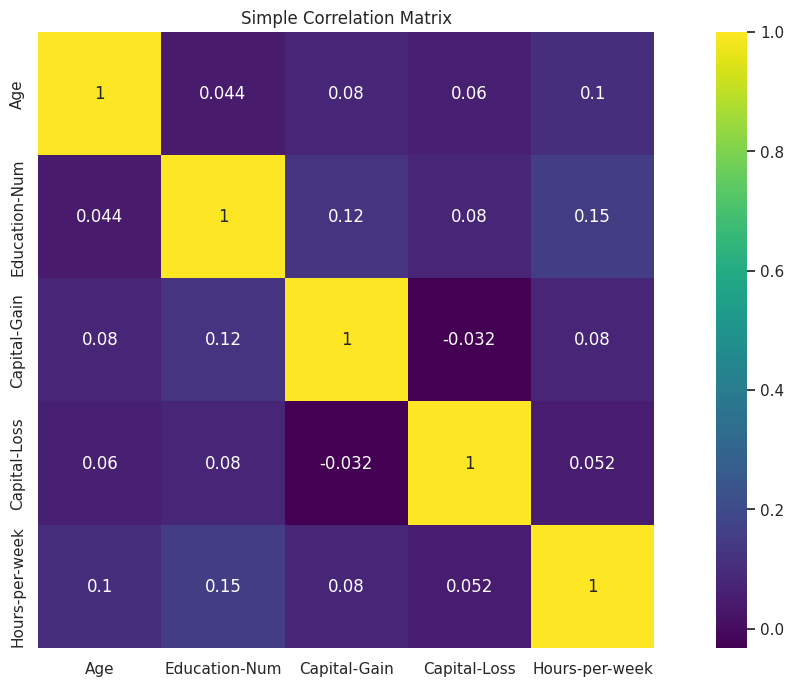

In [21]:
# Plot simple correlation matrix of numerical values (fnlwgt dropped)

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr().drop("fnlwgt", axis=1).drop("fnlwgt", axis=0), annot = True, fmt='.2g',cmap= 'viridis', square=True)
plt.title("Simple Correlation Matrix")
plt.show()

# Cramer's V correlation matrix

In [22]:
# Encoding the df
label = preprocessing.LabelEncoder()
df_encoded = pd.DataFrame()

for i in df.columns :
  df_encoded[i]=label.fit_transform(df[i])

df_encoded.drop('fnlwgt', axis=1, inplace=True)
df_encoded.drop('Education-Num', axis=1, inplace=True)
df_encoded.drop('Country', axis=1, inplace=True)

In [23]:
df_encoded.head()

,Age,Workclass,Education,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Over-50K,In-USA
0,22,5,9,4,0,1,4,1,24,0,39,0,1
1,33,4,9,2,3,0,4,1,0,0,12,0,1
2,21,2,11,0,5,1,4,1,0,0,39,0,1
3,36,2,1,2,5,0,2,1,0,0,39,0,1
4,11,2,9,2,9,5,2,0,0,0,39,0,0


In [24]:
def cramers_V(var1,var2):
  "Function that calculates Cramers V correlation"
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [25]:
# Calculation of the correlation matrix
rows= []
for var1 in df_encoded:
  col = []
  for var2 in df_encoded :
    cramers = cramers_V(df_encoded[var1], df_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
data = pd.DataFrame(cramers_results, columns = df_encoded.columns, index =df_encoded.columns)

data

,Age,Workclass,Education,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Over-50K,In-USA
Age,1.00,0.12,0.14,0.29,0.10,0.29,0.05,0.13,0.12,0.10,0.09,0.33,0.06
Workclass,0.12,1.00,0.11,0.08,0.22,0.09,0.06,0.15,0.10,0.07,0.13,0.16,0.05
Education,0.14,0.11,1.00,0.09,0.20,0.12,0.08,0.09,0.10,0.08,0.10,0.37,0.31
Marital-Status,0.29,0.08,0.09,1.00,0.13,0.49,0.08,0.47,0.15,0.11,0.14,0.45,0.12
Occupation,0.10,0.22,0.20,0.13,1.00,0.18,0.08,0.44,0.09,0.07,0.14,0.35,0.12
Relationship,0.29,0.09,0.12,0.49,0.18,1.00,0.10,0.65,0.17,0.13,0.18,0.45,0.12
Race,0.05,0.06,0.08,0.08,0.08,0.10,1.00,0.12,0.06,0.06,0.08,0.10,0.40
Sex,0.13,0.15,0.09,0.47,0.44,0.65,0.12,1.00,0.14,0.12,0.28,0.22,0.00
Capital-Gain,0.12,0.10,0.10,0.15,0.09,0.17,0.06,0.14,1.00,0.01,0.07,0.42,0.06
Capital-Loss,0.10,0.07,0.08,0.11,0.07,0.13,0.06,0.12,0.01,1.00,0.08,0.28,0.06


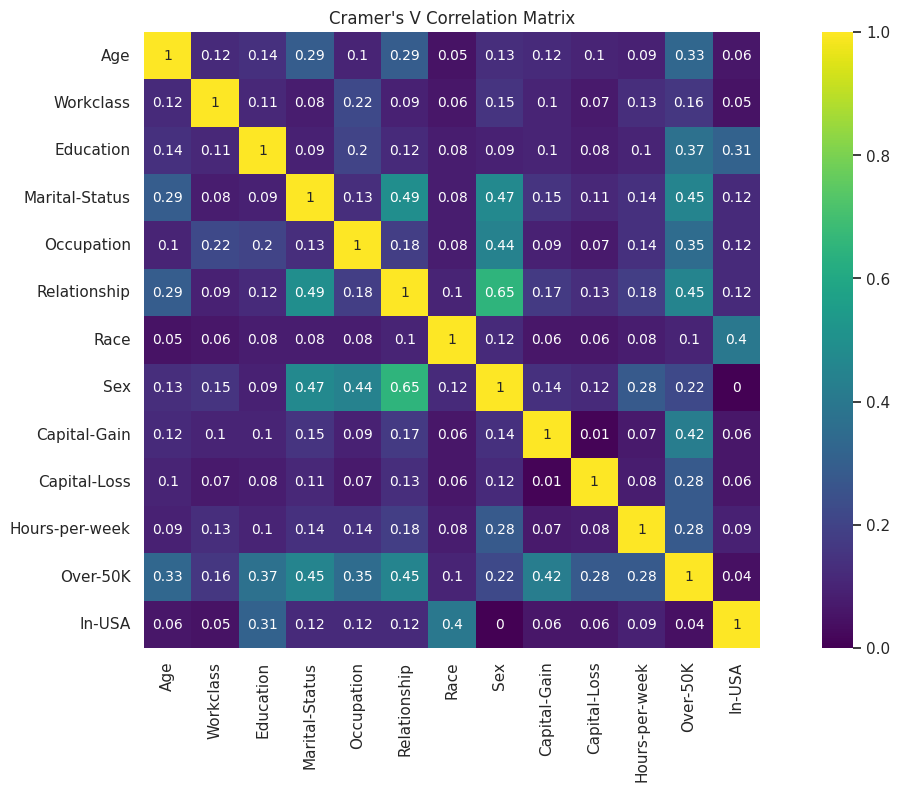

In [26]:
# Visualization of the correlation Matrix using Heatmap
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data, vmin=0., vmax=1, annot = True, annot_kws={"fontsize":10}, cmap= 'viridis', square=True)
plt.title("Cramer's V Correlation Matrix")

plt.show()

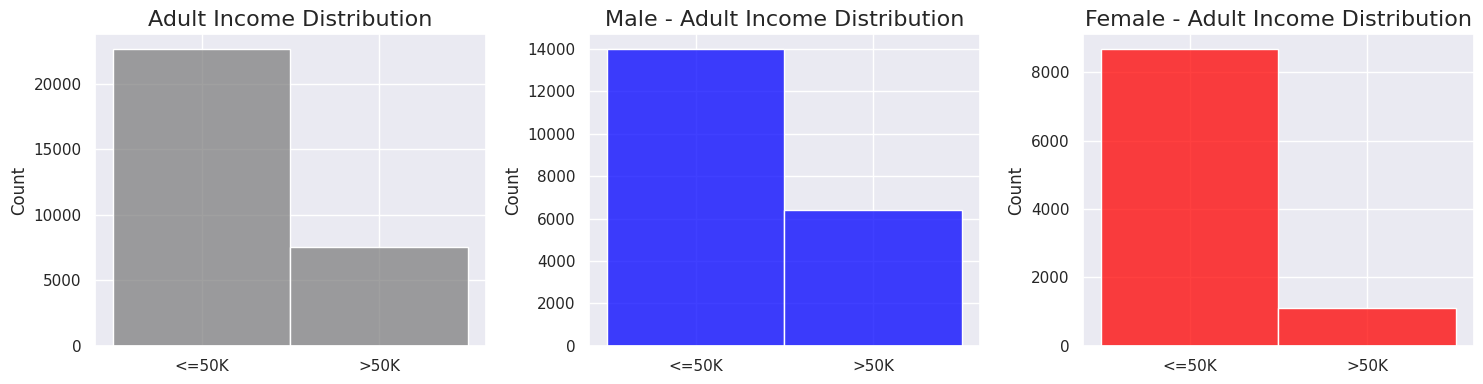

In [27]:
# Histograms of Distribution of income across Sex feature

overall = df['Over-50K'].values
male = df[df['Sex'] == 'Male']['Over-50K'].values
female = df[df['Sex'] == 'Female']['Over-50K'].values

fig, ax = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(overall, ax=ax[0], color= 'gray')
ax[0].set_title("Adult Income Distribution", fontsize=16)
sns.histplot(male, ax=ax[1], color="blue")
ax[1].set_title("Male - Adult Income Distribution", fontsize=16)
sns.histplot(female, ax=ax[2], color="red")
ax[2].set_title("Female - Adult Income Distribution", fontsize=16)
fig.tight_layout()
plt.show()

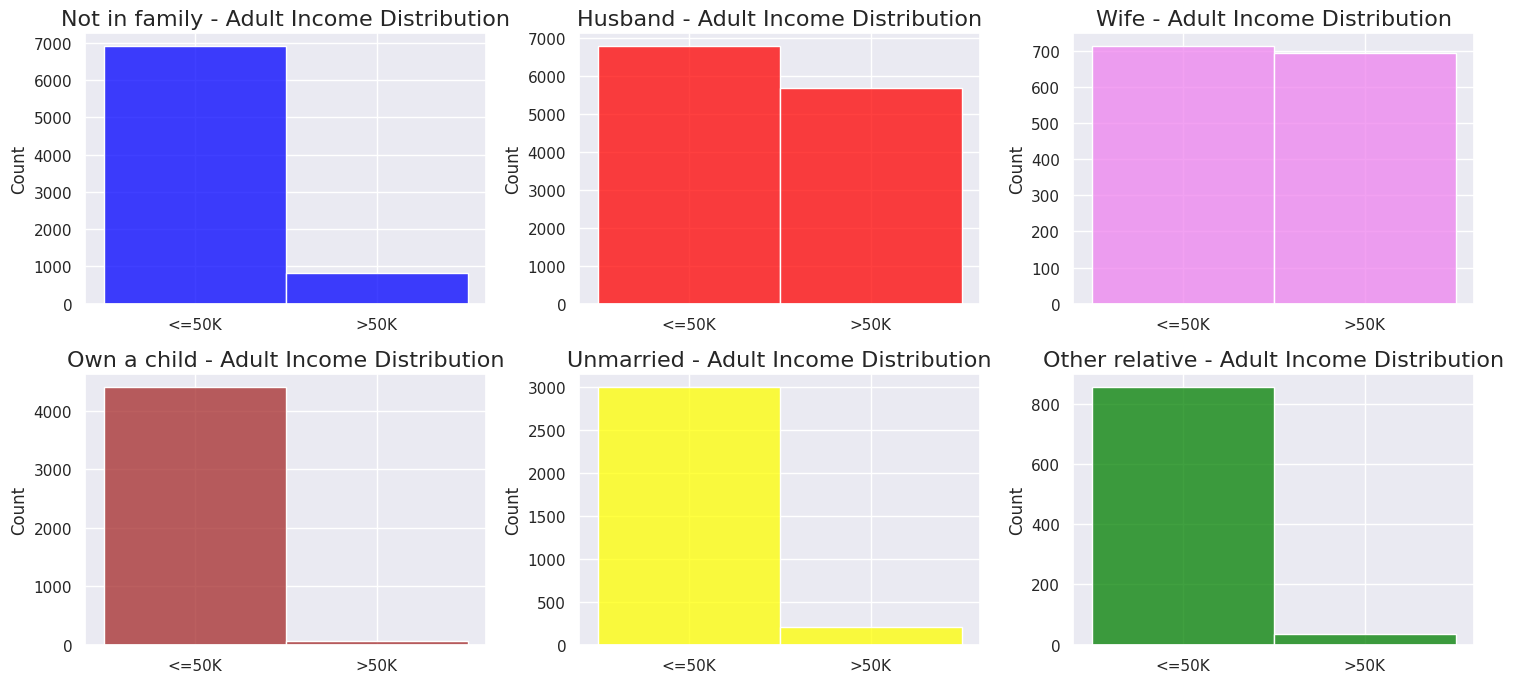

In [29]:
# Histograms of Distribution of income across Relationship feature

overall = df['Over-50K'].values
not_in_family = df[df['Relationship'] == 'Not-in-family']['Over-50K'].values
husband = df[df['Relationship'] == 'Husband']['Over-50K'].values
wife = df[df['Relationship'] == 'Wife']['Over-50K'].values
own_child = df[df['Relationship'] == 'Own-child']['Over-50K'].values
unmarried = df[df['Relationship'] == 'Unmarried']['Over-50K'].values
other_relative = df[df['Relationship'] == 'Other-relative']['Over-50K'].values

fig, ax = plt.subplots(2, 3, figsize=(15,7))
sns.histplot(not_in_family, ax=ax[0,0], color="blue")
ax[0,0].set_title("Not in family - Adult Income Distribution", fontsize=16)
sns.histplot(husband, ax=ax[0,1], color="red")
ax[0,1].set_title("Husband - Adult Income Distribution", fontsize=16)
sns.histplot(wife, ax=ax[0,2], color="violet")
ax[0,2].set_title("Wife - Adult Income Distribution", fontsize=16)
sns.histplot(own_child, ax=ax[1,0], color="brown")
ax[1,0].set_title("Own a child - Adult Income Distribution", fontsize=16)
sns.histplot(unmarried, ax=ax[1,1], color="yellow")
ax[1,1].set_title("Unmarried - Adult Income Distribution", fontsize=16)
sns.histplot(other_relative, ax=ax[1,2], color="green")
ax[1,2].set_title("Other relative - Adult Income Distribution", fontsize=16)
fig.tight_layout()
plt.show()

<ipython-input-30-ce9b2dcf8dc8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(box.get_xticklabels(), rotation= 45)


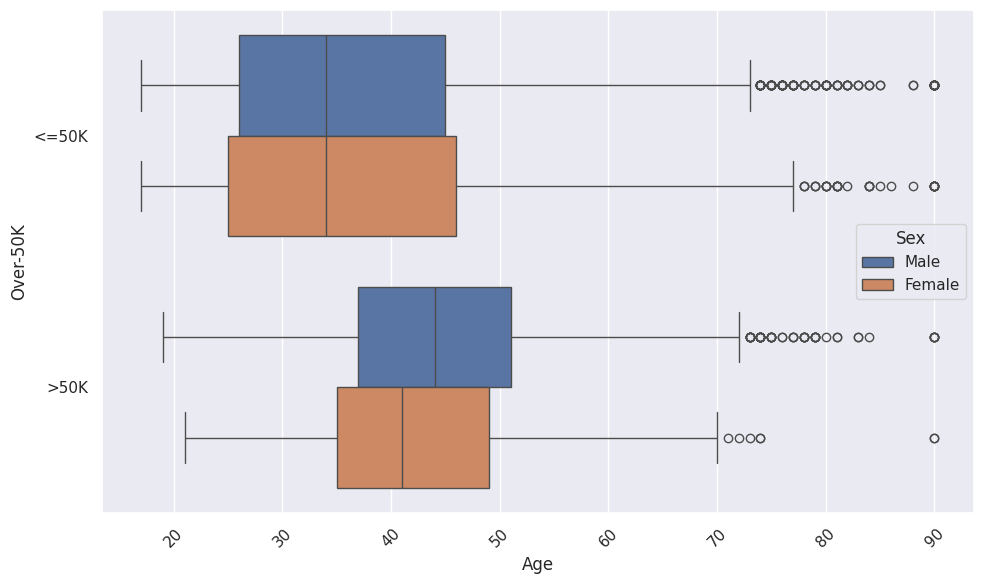

In [30]:
# Distribution of Age across income with Sex categorization

fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(y= 'Over-50K',x= 'Age', hue= 'Sex', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation= 45)
fig.subplots_adjust(bottom=0.2)
plt.tight_layout()

<ipython-input-31-753cca1e48fd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(box.get_xticklabels(), rotation= 45) # Properties like minimum, first quartile, median, third quartile, maximum and outliers can be detected


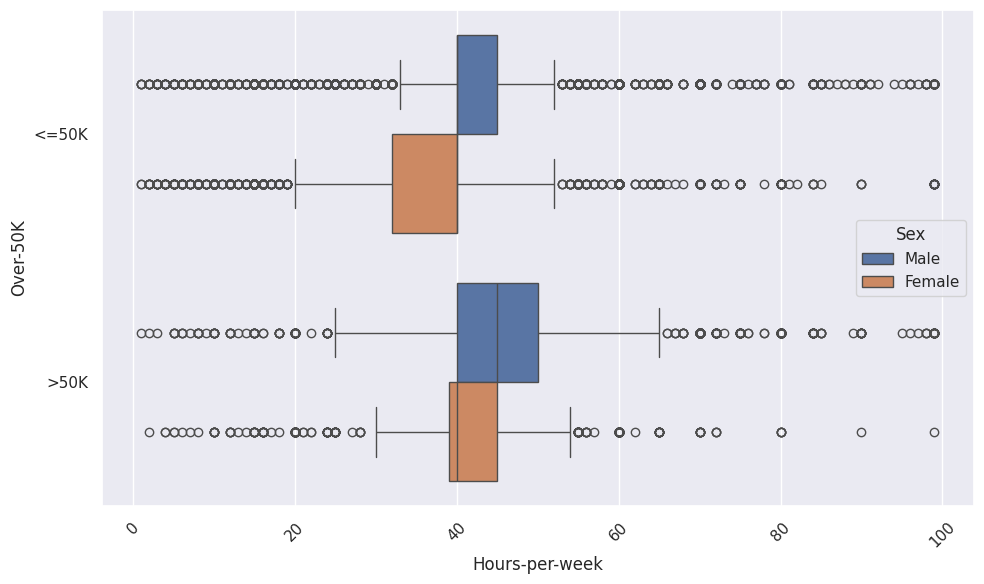

In [31]:
# Distribution of hours per week across income feature with Sex categorization
fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(x= 'Hours-per-week',y= 'Over-50K', hue= 'Sex', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation= 45) # Properties like minimum, first quartile, median, third quartile, maximum and outliers can be detected
fig.subplots_adjust(bottom=0.2)
plt.tight_layout()

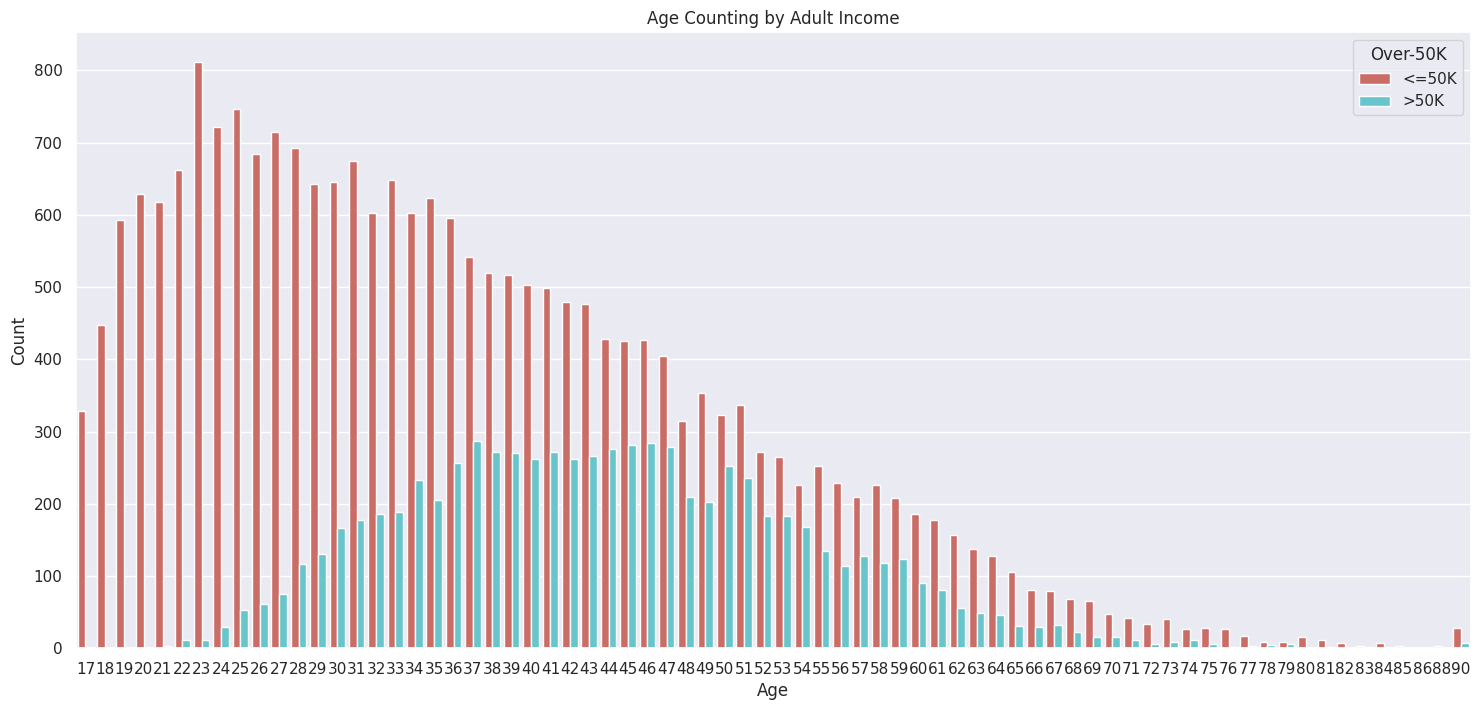

In [32]:
# Histogram across age feature with risk categorization
sns.set(rc = {'figure.figsize':(18,8)})
g2 = sns.countplot(x="Age",data=df,
              palette="hls",
              hue = "Over-50K")
g2.set_title("Age Counting by Adult Income")
g2.set_xlabel("Age")
g2.set_ylabel("Count")
# plt.xticks(rotation=0, fontsize=12)
plt.show()